# $E_{peak} - E_{iso}$ relation

Correlation between $E_{peak}$ (spectral peak energy from $\nu F_\nu - \nu$ diagram) and $E_{iso}$ (equivalent isotropic energy $E_\text{iso} = 4\pi D_L^2S/(1+z)$).
Since the scatter plot is logarithmic, the correlation will be a power-law.
$$E_{peak} = A \cdot E_{iso}^m$$
However, for the fit and ploting we will use a linear equivalent by taking the logarithm:
$$
\begin{align*}
    \log_{10} (E_\text{peak}) &= \log_{10}(A) + \log_{10} (E_\text{iso}) \times m \\
    y &= k + mx
\end{align*}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('table.csv') # read the data from Ghirlanda et al. 2008

Pandas reads the `'Eiso'` and `'Eiso_err'` columns as `string`, so passing the lists through `get_float` returns the correct variable type.

In [3]:
def get_float(col):
    return np.array([float(base) * 10**float(exponent) for val in col for base, exponent in [str(val).split('e')]])

Text(0, 0.5, '$log(E_{\\text{peak}})$')

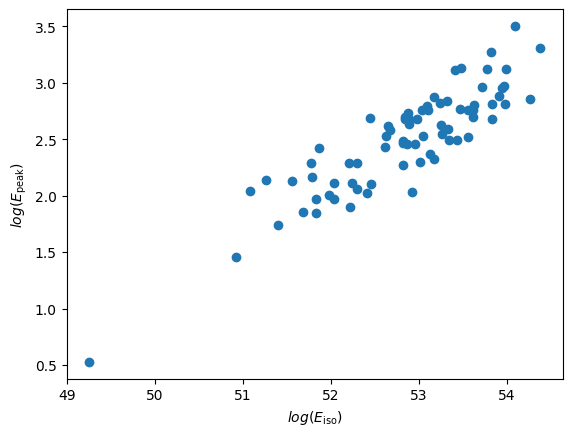

In [4]:
Epeak = np.log10(df['Epeak']) # keV
Eiso = np.log10(get_float(df['Eiso'])) # ergs

plt.figure()
plt.scatter(Eiso, Epeak)
#plt.errorbar(Eiso, Epeak, xerr=Eiso_err, yerr=Epeak_err, fmt='.') # everything in ergs

plt.xlabel(r'$log(E_{\text{iso}})$')
plt.ylabel(r'$log(E_{\text{peak}})$')

Next we'll try to find a fit for these GRB properties $(E_{\text{peak}}$ - $E_{\text{iso}})$ with the function $y = k + mx$, corresponding to the above definitions. I will use a goodness of fit (GoF) function (using the $\chi^2$ method and a parameter space $(m,q)$ to find the 'best fit'. For the `GoF` function I'll be using the $\chi^2$ method, following:
$$ \chi^2 = \sum_i (O_i - E_i)^2$$,
where $O_i$ and $E_i$ are the observed and expected values respectively.

In [5]:
def GoF(k,m,x=Eiso, y=Epeak):
    """
    Goodness of fit following the chi-squared formula
    :param m: y-axis cut
    :param q: slope
    :param x: x-values
    :param y: y-values
    :return: chi-squared value
    """

    model = k + (m*x)
    chi_squared = np.sum((y-model)**2)
    return chi_squared

In [6]:
k = np.linspace(-25.,-20.,100) # from the previous scatter plot, we can infer that the y-axis cut is around -25 and -20
m = np.linspace(.0,1.,100) # if this is the slope of the power-law, it must be positive

G = np.zeros([len(k),len(m)])
for i in range(len(k)):
    for j in range(len(m)):
        G[i][j] = GoF(k[i],m[j])

Now we extract the best fit parameters, i.e. where the error squares are the least, and plot the fit over the scatter.

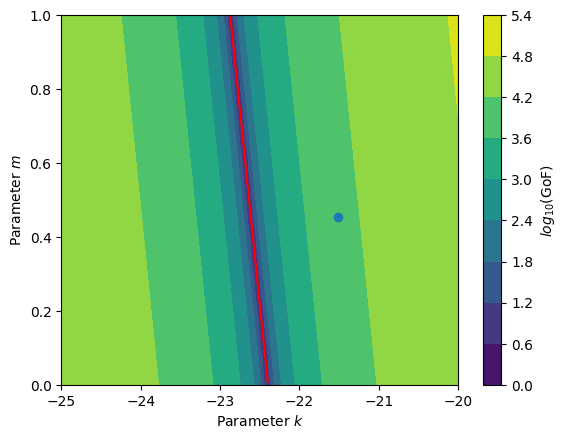

In [7]:
best_fit = np.argmin(G)
k_index, m_index = np.unravel_index(best_fit, G.shape)
k_fit, m_fit = k[k_index], m[m_index]

plt.figure()
plt.contourf(k,m,np.log10(G))
plt.colorbar(label=r'$log_{10}(\text{GoF})$')
plt.xlabel(r'Parameter $k$')
plt.ylabel(r'Parameter $m$')
plt.scatter(k_fit, m_fit)
k_val = np.linspace(-22.87,-22.399, 100)
plt.plot(k_val, -2.1*k_val+(22.8*-2.1+0.85), color='r')

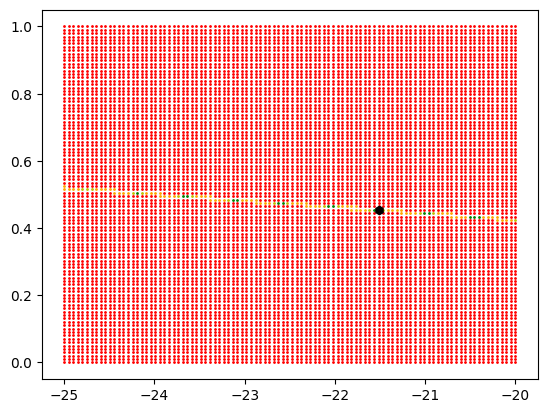

In [13]:
lower = np.argmin(G)
higher = np.argmax(G)
for i in range(len(k)):
    for j in range(len(m)):
        val = np.log10(G[i][j])
        if 0<val and val<=0.55:
            plt.scatter(k[i],m[j],color='g', s=1)
        elif 0.55<val and val<=.6:
            plt.scatter(k[i],m[j],color='y', s=1)
        elif 0.6<val and val<=1:
            plt.scatter(k[i],m[j],color='orange', s=1)
        else:
            plt.scatter(k[i],m[j],color='red', s=1)
plt.scatter(k_fit, m_fit, marker='h', color='black')

In [ ]:
plt.figure()
plt.scatter(Eiso, Epeak)
plt.plot(Eiso, k_fit+Eiso*m_fit, label=f'k={k_fit}, m={m_fit}', color='r')
#plt.plot(Eiso, -24+Eiso*0.5, color='g', label=f'k={-24}, m={0.5}')
plt.legend()
plt.xlabel(r'$E_\text{iso}$')
plt.ylabel(r'$E_\text{peak}$')

I'll check what the results with the scipy model are

In [ ]:
from scipy.optimize import curve_fit

def linear_model(x, k, m):
    return k + m * x

# Fit the model
popt, pcov = curve_fit(linear_model, Eiso, Epeak)
k_best, m_best = popt

# Get parameter uncertainties
param_errors = np.sqrt(np.diag(pcov))
print(f"Best fit: k = {k_best:.3f} ± {param_errors[0]:.3f}")
print(f"Best fit: m = {m_best:.3f} ± {param_errors[1]:.3f}")

plt.figure()
plt.scatter(Eiso, Epeak)
plt.plot(Eiso, Eiso*m_best + k_best, color='r', label=f'k={k_best:.3f} ± {param_errors[0]:.3f}, m={m_best:.3f} ± {param_errors[1]:.3f}')
plt.legend()
plt.xlabel(r'$E_\text{iso}$')
plt.ylabel(r'$E_\text{peak}$')

In [ ]:
correlation_matrix = pcov / np.outer(param_errors, param_errors)
print("Correlation matrix:")
print(correlation_matrix)
